# Air Quality Analysis and Prediction



---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

#####INSTALLING PYSPARK WILL BE THE FIRST STEP


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

!python -m pip install -q findspark

import findspark
findspark.init()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Air Quality Analysis").getOrCreate()

spark



In [ ]:
data = spark.read.csv("/content/gdrive/MyDrive/air-quality-data.csv", header = True, inferSchema = True)
data.show()

+----------+--------+------+-----------+--------+--------+-------------+-------+------------+-------+------------+-----------+----+----+-----+
|      Date|    Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|PT08.S4(NO2)|PT08.S5(O3)|   T|  RH|   AH|
+----------+--------+------+-----------+--------+--------+-------------+-------+------------+-------+------------+-----------+----+----+-----+
|10/03/2004|18.00.00|   2,6|       1360|     150|    11,9|         1046|    166|        1056|    113|        1692|       1268|13,6|48,9|7,578|
|10/03/2004|19.00.00|     2|       1292|     112|     9,4|          955|    103|        1174|     92|        1559|        972|13,3|47,7|7,255|
|10/03/2004|20.00.00|   2,2|       1402|      88|     9,0|          939|    131|        1140|    114|        1555|       1074|11,9|54,0|7,502|
|10/03/2004|21.00.00|   2,2|       1376|      80|     9,2|          948|    172|        1092|    122|        1584|       1203|11,0|60,0|7,867|

In [ ]:
data.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- CO(GT): string (nullable = true)
 |-- PT08.S1(CO): integer (nullable = true)
 |-- NMHC(GT): integer (nullable = true)
 |-- C6H6(GT): string (nullable = true)
 |-- PT08.S2(NMHC): integer (nullable = true)
 |-- NOx(GT): integer (nullable = true)
 |-- PT08.S3(NOx): integer (nullable = true)
 |-- NO2(GT): integer (nullable = true)
 |-- PT08.S4(NO2): integer (nullable = true)
 |-- PT08.S5(O3): integer (nullable = true)
 |-- T: string (nullable = true)
 |-- RH: string (nullable = true)
 |-- AH: string (nullable = true)



##### Describing the Meaning of Each Column in the Dataset

##### Date:
- **Definition:** This column represents the date on which the measurements were taken.
- **Format:** The date is in the format "DD/MM/YYYY", where DD is the day, MM is the month, and YYYY is the year.

##### Time:
- **Definition:** This column represents the time at which the measurements were taken.
- **Format:** The time is in the format "HH:MM:SS", where HH is the hour (in 24-hour format), MM is the minute, and SS is the second.

##### CO(GT):
- **Definition:** This column represents the concentration of carbon monoxide (CO) in the air.
- **Unit:** Parts per million (ppm).

##### PT08.S1(CO):
- **Definition:** This column represents the Tin Oxide (SnO2) sensor response for carbon monoxide (CO).
- **Unit:** Relative response.

##### NMHC(GT):
- **Definition:** This column represents the concentration of non-methane hydrocarbons (NMHC) in the air.
- **Unit:** Micrograms per cubic meter (µg/m³).

##### C6H6(GT):
- **Definition:** This column represents the concentration of benzene (C6H6) in the air.
- **Unit:** Micrograms per cubic meter (µg/m³).

##### PT08.S2(NMHC):
- **Definition:** This column represents the Titania (TiO2) sensor response for non-methane hydrocarbons (NMHC).
- **Unit:** Relative response.

##### NOx(GT):
- **Definition:** This column represents the concentration of nitrogen oxides (NOx) in the air.
- **Unit:** Parts per billion (ppb).

##### PT08.S3(NOx):
- **Definition:** This column represents the Tungsten Oxide (WO3) sensor response for nitrogen oxides (NOx).
- **Unit:** Relative response.

##### NO2(GT):
- **Definition:** This column represents the concentration of nitrogen dioxide (NO2) in the air.
- **Unit:** Parts per billion (ppb).

##### PT08.S4(NO2):
- **Definition:** This column represents the Tungsten Oxide (WO3) sensor response for nitrogen dioxide (NO2).
- **Unit:** Relative response.

##### PT08.S5(O3):
- **Definition:** This column represents the Indium Oxide (In2O3) sensor response for ozone (O3).
- **Unit:** Relative response.

##### T:
- **Definition:** This column represents the temperature at the time of measurement.
- **Unit:** Degrees Celsius (°C).

##### RH:
- **Definition:** This column represents the relative humidity at the time of measurement.
- **Unit:** Percentage (%).

##### AH:
- **Definition:** This column represents the absolute humidity at the time of measurement.
- **Calculation:** AH = (absolute humidity * 100) / saturation vapor pressure at the current temperature.
- **Unit:** Grams per cubic meter (g/m³).


##### Reasons for Choosing the Dataset
I chose this dataset for several reasons:
- **Relevance:** The dataset contains measurements related to air quality, which is a crucial aspect of environmental and public health.
- **Availability:** The dataset is readily available and provides a comprehensive set of attributes for analysis.
- **Interest:** Analyzing air quality data aligns with my interest in environmental science and data analysis.

##### Variables to Use
I will primarily focus on the following variables for analysis:
- **CO(GT):** Concentration of carbon monoxide in the air.
- **NMHC(GT):** Concentration of non-methane hydrocarbons in the air.
- **NOx(GT):** Concentration of nitrogen oxides in the air.
- **T:** Temperature at the time of measurement.
- **RH:** Relative humidity at the time of measurement.

##### Analysis to Run
I plan to perform the following analyses:
- **Descriptive Analysis:** Summarize the key statistics and distributions of the selected variables.
- **Correlation Analysis:** Explore the relationships between different variables, particularly between air pollutants and environmental factors such as temperature and humidity.
- **Hypothesis Testing:** Test hypotheses regarding the effects of environmental factors on air pollution levels.

##### Hypotheses
Based on initial observations, I have the this hypotheses:

**Temperature and Air Quality:** I hypothesize that there is a positive correlation between temperature and the concentration of air pollutants such as carbon monoxide and non-methane hydrocarbons. Higher temperatures may lead to increased emissions and higher pollutant concentrations.



#####Explanation of Relevant Features

 - **CO(GT)**: Concentration of carbon monoxide in parts per million (ppm). This feature is crucial for understanding the level of carbon monoxide, which is a harmful air pollutant.

- **NMHC(GT)**: Concentration of non-methane hydrocarbons in micrograms per cubic meter (µg/m³). Non-methane hydrocarbons contribute to air pollution and can have adverse effects on human health and the environment.

- **NOx(GT)**: Concentration of nitrogen oxides in parts per billion (ppb). Nitrogen oxides are air pollutants that contribute to the formation of smog and acid rain, and can have respiratory and environmental impacts.

- **T**: Temperature in degrees Celsius (°C). Temperature is an important environmental factor that can influence the concentration and behavior of air pollutants.

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

In [ ]:
data.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- CO(GT): string (nullable = true)
 |-- PT08.S1(CO): integer (nullable = true)
 |-- NMHC(GT): integer (nullable = true)
 |-- C6H6(GT): string (nullable = true)
 |-- PT08.S2(NMHC): integer (nullable = true)
 |-- NOx(GT): integer (nullable = true)
 |-- PT08.S3(NOx): integer (nullable = true)
 |-- NO2(GT): integer (nullable = true)
 |-- PT08.S4(NO2): integer (nullable = true)
 |-- PT08.S5(O3): integer (nullable = true)
 |-- T: string (nullable = true)
 |-- RH: string (nullable = true)
 |-- AH: string (nullable = true)



In [ ]:
data.show()

+----------+--------+------+-----------+--------+--------+-------------+-------+------------+-------+------------+-----------+----+----+-----+
|      Date|    Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|PT08.S4(NO2)|PT08.S5(O3)|   T|  RH|   AH|
+----------+--------+------+-----------+--------+--------+-------------+-------+------------+-------+------------+-----------+----+----+-----+
|10/03/2004|18.00.00|   2,6|       1360|     150|    11,9|         1046|    166|        1056|    113|        1692|       1268|13,6|48,9|7,578|
|10/03/2004|19.00.00|     2|       1292|     112|     9,4|          955|    103|        1174|     92|        1559|        972|13,3|47,7|7,255|
|10/03/2004|20.00.00|   2,2|       1402|      88|     9,0|          939|    131|        1140|    114|        1555|       1074|11,9|54,0|7,502|
|10/03/2004|21.00.00|   2,2|       1376|      80|     9,2|          948|    172|        1092|    122|        1584|       1203|11,0|60,0|7,867|

Now, after examining the data and schema, I think I need to change some things.

- The numeric values of some columnshave comma `(,)` in them, but not period `(.)`, and I need to change them.
- Also, I need to change the schema of the updated numeric columns after updating them. I choose `double()`.

In [ ]:
from pyspark.sql.functions import col, regexp_replace
columns_to_change = ["CO(GT)", "NMHC(GT)", "C6H6(GT)", "T", "RH", "AH", ]

for column in columns_to_change:
    data = data.withColumn(column, regexp_replace(col(column), ',', '.'))

data.show()

+----------+--------+------+-----------+--------+--------+-------------+-------+------------+-------+------------+-----------+----+----+-----+
|      Date|    Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|PT08.S4(NO2)|PT08.S5(O3)|   T|  RH|   AH|
+----------+--------+------+-----------+--------+--------+-------------+-------+------------+-------+------------+-----------+----+----+-----+
|10/03/2004|18.00.00|   2.6|       1360|     150|    11.9|         1046|    166|        1056|    113|        1692|       1268|13.6|48.9|7.578|
|10/03/2004|19.00.00|     2|       1292|     112|     9.4|          955|    103|        1174|     92|        1559|        972|13.3|47.7|7.255|
|10/03/2004|20.00.00|   2.2|       1402|      88|     9.0|          939|    131|        1140|    114|        1555|       1074|11.9|54.0|7.502|
|10/03/2004|21.00.00|   2.2|       1376|      80|     9.2|          948|    172|        1092|    122|        1584|       1203|11.0|60.0|7.867|

I want to rename columns with lower letters and underscores only, no other characters

In [ ]:
current_cols = data.columns
new_cols = [col.lower().replace('(', '').replace(')', '').replace('.', '_').replace(' ', '_') for col in current_cols]

data = data.toDF(*new_cols)

data.show()

+----------+--------+----+---------+------+------+-----------+-----+----------+-----+----------+---------+----+----+-----+
|      date|    time|cogt|pt08_s1co|nmhcgt|c6h6gt|pt08_s2nmhc|noxgt|pt08_s3nox|no2gt|pt08_s4no2|pt08_s5o3|   t|  rh|   ah|
+----------+--------+----+---------+------+------+-----------+-----+----------+-----+----------+---------+----+----+-----+
|10/03/2004|18.00.00| 2.6|     1360|   150|  11.9|       1046|  166|      1056|  113|      1692|     1268|13.6|48.9|7.578|
|10/03/2004|19.00.00|   2|     1292|   112|   9.4|        955|  103|      1174|   92|      1559|      972|13.3|47.7|7.255|
|10/03/2004|20.00.00| 2.2|     1402|    88|   9.0|        939|  131|      1140|  114|      1555|     1074|11.9|54.0|7.502|
|10/03/2004|21.00.00| 2.2|     1376|    80|   9.2|        948|  172|      1092|  122|      1584|     1203|11.0|60.0|7.867|
|10/03/2004|22.00.00| 1.6|     1272|    51|   6.5|        836|  131|      1205|  116|      1490|     1110|11.2|59.6|7.888|
|10/03/2004|23.0

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import to_date
data = data.withColumn("date", to_date("date", "dd/MM/yyyy"))



double_cols = ['cogt', 'pt08_s1co', 'nmhcgt', 'c6h6gt', 'pt08_s2nmhc', 'noxgt', 'pt08_s3nox', \
               'no2gt', 'pt08_s4no2', 'pt08_s5o3', 't', 'rh', 'ah']
for col_name in double_cols:
    data = data.withColumn(col_name, col(col_name).cast('double'))

data.printSchema()

root
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- cogt: double (nullable = true)
 |-- pt08_s1co: double (nullable = true)
 |-- nmhcgt: double (nullable = true)
 |-- c6h6gt: double (nullable = true)
 |-- pt08_s2nmhc: double (nullable = true)
 |-- noxgt: double (nullable = true)
 |-- pt08_s3nox: double (nullable = true)
 |-- no2gt: double (nullable = true)
 |-- pt08_s4no2: double (nullable = true)
 |-- pt08_s5o3: double (nullable = true)
 |-- t: double (nullable = true)
 |-- rh: double (nullable = true)
 |-- ah: double (nullable = true)



Now, the datatypes are also changed


In [ ]:
data.show()

+----------+--------+------+---------+------+------+-----------+------+----------+------+----------+---------+----+----+-----+
|      date|    time|  cogt|pt08_s1co|nmhcgt|c6h6gt|pt08_s2nmhc| noxgt|pt08_s3nox| no2gt|pt08_s4no2|pt08_s5o3|   t|  rh|   ah|
+----------+--------+------+---------+------+------+-----------+------+----------+------+----------+---------+----+----+-----+
|2004-03-10|18.00.00|   2.6|   1360.0| 150.0|  11.9|     1046.0| 166.0|    1056.0| 113.0|    1692.0|   1268.0|13.6|48.9|7.578|
|2004-03-10|19.00.00|   2.0|   1292.0| 112.0|   9.4|      955.0| 103.0|    1174.0|  92.0|    1559.0|    972.0|13.3|47.7|7.255|
|2004-03-10|20.00.00|   2.2|   1402.0|  88.0|   9.0|      939.0| 131.0|    1140.0| 114.0|    1555.0|   1074.0|11.9|54.0|7.502|
|2004-03-10|21.00.00|   2.2|   1376.0|  80.0|   9.2|      948.0| 172.0|    1092.0| 122.0|    1584.0|   1203.0|11.0|60.0|7.867|
|2004-03-10|22.00.00|   1.6|   1272.0|  51.0|   6.5|      836.0| 131.0|    1205.0| 116.0|    1490.0|   1110.0|1

Now I want to check for any null values



In [ ]:
null_counts = {col: data.where(data[col].isNull()).count() for col in data.columns}
null_counts



{'date': 0,
 'time': 0,
 'cogt': 0,
 'pt08_s1co': 0,
 'nmhcgt': 0,
 'c6h6gt': 0,
 'pt08_s2nmhc': 0,
 'noxgt': 0,
 'pt08_s3nox': 0,
 'no2gt': 0,
 'pt08_s4no2': 0,
 'pt08_s5o3': 0,
 't': 0,
 'rh': 0,
 'ah': 0}

There are no null values, but instead the null values are filled with value `-200.0` in the data.

In [ ]:
from pyspark.sql.functions import col, expr


num_cols = ["cogt", "pt08_s1co", "nmhcgt", "c6h6gt", "pt08_s2nmhc", "noxgt", "pt08_s3nox", "no2gt",
            "pt08_s4no2", "pt08_s5o3", "t", "rh", "ah"]

quartiles = data.approxQuantile(num_cols, [0.25, 0.75], 0.01)
iqr_dict = {col_name: quartiles[num_cols.index(col_name)][1] - quartiles[num_cols.index(col_name)][0]
            for col_name in num_cols}
bounds_dict = {col_name: (quartiles[num_cols.index(col_name)][0] - 1.5 * iqr_dict[col_name],
                          quartiles[num_cols.index(col_name)][1] + 1.5 * iqr_dict[col_name])
               for col_name in num_cols}
outliers_expr = [expr(f"{col_name} < {bounds_dict[col_name][0]} or {col_name} > {bounds_dict[col_name][1]}")
                 for col_name in num_cols]

filtered_data = data.filter(~(outliers_expr[0] & outliers_expr[1] & outliers_expr[2] & outliers_expr[3] &
                               outliers_expr[4] & outliers_expr[5] & outliers_expr[6] & outliers_expr[7] &
                               outliers_expr[8] & outliers_expr[9] & outliers_expr[10] & outliers_expr[11] &
                               outliers_expr[12]))

In [ ]:
filtered_data.show()

+----------+--------+------+---------+------+------+-----------+------+----------+------+----------+---------+----+----+-----+
|      date|    time|  cogt|pt08_s1co|nmhcgt|c6h6gt|pt08_s2nmhc| noxgt|pt08_s3nox| no2gt|pt08_s4no2|pt08_s5o3|   t|  rh|   ah|
+----------+--------+------+---------+------+------+-----------+------+----------+------+----------+---------+----+----+-----+
|2004-03-10|18.00.00|   2.6|   1360.0| 150.0|  11.9|     1046.0| 166.0|    1056.0| 113.0|    1692.0|   1268.0|13.6|48.9|7.578|
|2004-03-10|19.00.00|   2.0|   1292.0| 112.0|   9.4|      955.0| 103.0|    1174.0|  92.0|    1559.0|    972.0|13.3|47.7|7.255|
|2004-03-10|20.00.00|   2.2|   1402.0|  88.0|   9.0|      939.0| 131.0|    1140.0| 114.0|    1555.0|   1074.0|11.9|54.0|7.502|
|2004-03-10|21.00.00|   2.2|   1376.0|  80.0|   9.2|      948.0| 172.0|    1092.0| 122.0|    1584.0|   1203.0|11.0|60.0|7.867|
|2004-03-10|22.00.00|   1.6|   1272.0|  51.0|   6.5|      836.0| 131.0|    1205.0| 116.0|    1490.0|   1110.0|1

In [ ]:
filtered_data.printSchema()

root
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- cogt: double (nullable = true)
 |-- pt08_s1co: double (nullable = true)
 |-- nmhcgt: double (nullable = true)
 |-- c6h6gt: double (nullable = true)
 |-- pt08_s2nmhc: double (nullable = true)
 |-- noxgt: double (nullable = true)
 |-- pt08_s3nox: double (nullable = true)
 |-- no2gt: double (nullable = true)
 |-- pt08_s4no2: double (nullable = true)
 |-- pt08_s5o3: double (nullable = true)
 |-- t: double (nullable = true)
 |-- rh: double (nullable = true)
 |-- ah: double (nullable = true)



In [ ]:
filtered_data.columns

['date',
 'time',
 'cogt',
 'pt08_s1co',
 'nmhcgt',
 'c6h6gt',
 'pt08_s2nmhc',
 'noxgt',
 'pt08_s3nox',
 'no2gt',
 'pt08_s4no2',
 'pt08_s5o3',
 't',
 'rh',
 'ah']

I can see that the some values in the dataset are with `-200.0` values. These are probably the missing values. I would like to remove these too.

In [ ]:
from pyspark.sql.functions import col

cleaned_data = filtered_data.filter((col("cogt") != -200.0) &
                                    (col("pt08_s1co") != -200.0) &
                                    (col("nmhcgt") != -200.0) &
                                    (col("c6h6gt") != -200.0) &
                                    (col("pt08_s2nmhc") != -200.0) &
                                    (col("noxgt") != -200.0) &
                                    (col("pt08_s3nox") != -200.0) &
                                    (col("no2gt") != -200.0) &
                                    (col("pt08_s4no2") != -200.0) &
                                    (col("pt08_s5o3") != -200.0) &
                                    (col("t") != -200.0) &
                                    (col("rh") != -200.0) &
                                    (col("ah") != -200.0)
)


In [ ]:
cleaned_data.show(truncate = False)

+----------+--------+----+---------+------+------+-----------+-----+----------+-----+----------+---------+----+----+-----+
|date      |time    |cogt|pt08_s1co|nmhcgt|c6h6gt|pt08_s2nmhc|noxgt|pt08_s3nox|no2gt|pt08_s4no2|pt08_s5o3|t   |rh  |ah   |
+----------+--------+----+---------+------+------+-----------+-----+----------+-----+----------+---------+----+----+-----+
|2004-03-10|18.00.00|2.6 |1360.0   |150.0 |11.9  |1046.0     |166.0|1056.0    |113.0|1692.0    |1268.0   |13.6|48.9|7.578|
|2004-03-10|19.00.00|2.0 |1292.0   |112.0 |9.4   |955.0      |103.0|1174.0    |92.0 |1559.0    |972.0    |13.3|47.7|7.255|
|2004-03-10|20.00.00|2.2 |1402.0   |88.0  |9.0   |939.0      |131.0|1140.0    |114.0|1555.0    |1074.0   |11.9|54.0|7.502|
|2004-03-10|21.00.00|2.2 |1376.0   |80.0  |9.2   |948.0      |172.0|1092.0    |122.0|1584.0    |1203.0   |11.0|60.0|7.867|
|2004-03-10|22.00.00|1.6 |1272.0   |51.0  |6.5   |836.0      |131.0|1205.0    |116.0|1490.0    |1110.0   |11.2|59.6|7.888|
|2004-03-10|23.0

And now, I believe this is the cleanest data, with no missing value, no outliers etc.

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a Udata to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

I have given a hypotheses above, and selected some of the relavent features, without performing any analysis.
I feel like temperature is positively correlated to levels of pollutants in air. But, lets do the correlation analysis and then come to conclusion. Then I will select the relavent features

In [ ]:
from pyspark.sql.functions import corr

cols_for_corr = ["cogt", "nmhcgt", "c6h6gt", "noxgt", "no2gt", "pt08_s1co", "pt08_s2nmhc",
                 "pt08_s3nox", "pt08_s4no2", "pt08_s5o3", "t"]

#Calculating correlation between pollutants and temperature
correlation_data = cleaned_data.select([corr(col1, col2).alias(f"correlation_{col1}_temperature")
                                for col1 in cols_for_corr for col2 in ["t"]])

In [ ]:
correlation_data.show(truncate = False)


+----------------------------+------------------------------+------------------------------+-----------------------------+-----------------------------+---------------------------------+-----------------------------------+----------------------------------+----------------------------------+---------------------------------+-------------------------+
|correlation_cogt_temperature|correlation_nmhcgt_temperature|correlation_c6h6gt_temperature|correlation_noxgt_temperature|correlation_no2gt_temperature|correlation_pt08_s1co_temperature|correlation_pt08_s2nmhc_temperature|correlation_pt08_s3nox_temperature|correlation_pt08_s4no2_temperature|correlation_pt08_s5o3_temperature|correlation_t_temperature|
+----------------------------+------------------------------+------------------------------+-----------------------------+-----------------------------+---------------------------------+-----------------------------------+----------------------------------+----------------------------------+--


**Positive Correlation:**

The columns `cogt, nmhcgt, c6h6gt, noxgt, no2gt, pt08_s1co, pt08_s2nmhc, pt08_s4no2, and pt08_s5o3` exhibit positive correlations with `temperature`. This suggests that as the temperature increases, the levels of these pollutants also tend to increase.
The correlation coefficients range from approximately `0.3 to 0.4`, indicating moderate positive correlations.

**Weak or Negative Correlation:**

The column `pt08_s3nox` show weak or negative correlations with temperature. This suggests that there might not be a clear relationship between these pollutants and temperature, or there might be other factors influencing their levels

Based on these observations, I may consider selecting the following features for further analysis:

 - `cogt`
 - `nmhcgt`
 - `c6h6gt`
 - `noxgt`
 - `no2gt`
 - `pt08_s1co`
 - `pt08_s2nmhc`
 - `pt08_s4no2`
 - `pt08_s5o3`

These features have a relatively strong positive correlation with temperature and are likely to be more relevant for exploring the hypothesis that pollutant levels are positively correlated with temperature.






In [ ]:
selected_columns = ["cogt", "nmhcgt", "c6h6gt", "noxgt", "no2gt", "pt08_s1co", "pt08_s2nmhc", "pt08_s4no2", "pt08_s5o3", "t"]
selected_data = cleaned_data.select(selected_columns)


In [ ]:
selected_data.show(truncate = False)

+----+------+------+-----+-----+---------+-----------+----------+---------+----+
|cogt|nmhcgt|c6h6gt|noxgt|no2gt|pt08_s1co|pt08_s2nmhc|pt08_s4no2|pt08_s5o3|t   |
+----+------+------+-----+-----+---------+-----------+----------+---------+----+
|2.6 |150.0 |11.9  |166.0|113.0|1360.0   |1046.0     |1692.0    |1268.0   |13.6|
|2.0 |112.0 |9.4   |103.0|92.0 |1292.0   |955.0      |1559.0    |972.0    |13.3|
|2.2 |88.0  |9.0   |131.0|114.0|1402.0   |939.0      |1555.0    |1074.0   |11.9|
|2.2 |80.0  |9.2   |172.0|122.0|1376.0   |948.0      |1584.0    |1203.0   |11.0|
|1.6 |51.0  |6.5   |131.0|116.0|1272.0   |836.0      |1490.0    |1110.0   |11.2|
|1.2 |38.0  |4.7   |89.0 |96.0 |1197.0   |750.0      |1393.0    |949.0    |11.2|
|1.2 |31.0  |3.6   |62.0 |77.0 |1185.0   |690.0      |1333.0    |733.0    |11.3|
|1.0 |31.0  |3.3   |62.0 |76.0 |1136.0   |672.0      |1333.0    |730.0    |10.7|
|0.9 |24.0  |2.3   |45.0 |60.0 |1094.0   |609.0      |1276.0    |620.0    |10.7|
|0.7 |8.0   |1.1   |16.0 |28

In [ ]:
selected_data.printSchema()

root
 |-- cogt: double (nullable = true)
 |-- nmhcgt: double (nullable = true)
 |-- c6h6gt: double (nullable = true)
 |-- noxgt: double (nullable = true)
 |-- no2gt: double (nullable = true)
 |-- pt08_s1co: double (nullable = true)
 |-- pt08_s2nmhc: double (nullable = true)
 |-- pt08_s4no2: double (nullable = true)
 |-- pt08_s5o3: double (nullable = true)
 |-- t: double (nullable = true)



Now, I wanted to split the data into test and train data

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["cogt", "nmhcgt", "c6h6gt", "noxgt", "no2gt", "pt08_s1co", "pt08_s2nmhc", "pt08_s4no2", "pt08_s5o3"],
    outputCol="features")

transformed_data = assembler.transform(selected_data)

train_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=42)


In [ ]:
train_data.show(truncate = False)

+----+------+------+-----+-----+---------+-----------+----------+---------+----+-------------------------------------------------+
|cogt|nmhcgt|c6h6gt|noxgt|no2gt|pt08_s1co|pt08_s2nmhc|pt08_s4no2|pt08_s5o3|t   |features                                         |
+----+------+------+-----+-----+---------+-----------+----------+---------+----+-------------------------------------------------+
|0.3 |9.0   |0.7   |16.0 |25.0 |753.0    |462.0      |955.0     |274.0    |13.9|[0.3,9.0,0.7,16.0,25.0,753.0,462.0,955.0,274.0]  |
|0.3 |14.0  |0.5   |16.0 |26.0 |785.0    |448.0      |1003.0    |263.0    |13.5|[0.3,14.0,0.5,16.0,26.0,785.0,448.0,1003.0,263.0]|
|0.3 |20.0  |0.7   |14.0 |20.0 |763.0    |471.0      |1098.0    |305.0    |12.5|[0.3,20.0,0.7,14.0,20.0,763.0,471.0,1098.0,305.0]|
|0.3 |29.0  |1.2   |18.0 |29.0 |837.0    |518.0      |1182.0    |360.0    |10.5|[0.3,29.0,1.2,18.0,29.0,837.0,518.0,1182.0,360.0]|
|0.3 |30.0  |0.7   |12.0 |19.0 |804.0    |468.0      |1166.0    |320.0    |15.7|[0.

In [ ]:
test_data.show(truncate = False)

+----+------+------+-----+-----+---------+-----------+----------+---------+----+--------------------------------------------------+
|cogt|nmhcgt|c6h6gt|noxgt|no2gt|pt08_s1co|pt08_s2nmhc|pt08_s4no2|pt08_s5o3|t   |features                                          |
+----+------+------+-----+-----+---------+-----------+----------+---------+----+--------------------------------------------------+
|0.3 |19.0  |0.6   |13.0 |22.0 |834.0    |459.0      |1212.0    |361.0    |8.8 |[0.3,19.0,0.6,13.0,22.0,834.0,459.0,1212.0,361.0] |
|0.3 |32.0  |0.8   |22.0 |32.0 |824.0    |478.0      |1200.0    |331.0    |15.3|[0.3,32.0,0.8,22.0,32.0,824.0,478.0,1200.0,331.0] |
|0.4 |21.0  |1.2   |35.0 |44.0 |809.0    |521.0      |1158.0    |378.0    |13.9|[0.4,21.0,1.2,35.0,44.0,809.0,521.0,1158.0,378.0] |
|0.5 |18.0  |0.8   |15.0 |26.0 |851.0    |477.0      |1064.0    |343.0    |14.5|[0.5,18.0,0.8,15.0,26.0,851.0,477.0,1064.0,343.0] |
|0.5 |29.0  |0.9   |18.0 |28.0 |858.0    |490.0      |1212.0    |378.0    |9

In [ ]:
print(f"Train Size: {train_data.count()}\nTest Size: {test_data.count()}")

Train Size: 695
Test Size: 132


Now we have test and train data. We can proceed to predictions of ML model.

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


Now that we have train and test data, I think we can proceed to ML predictions. Based on the hypotheses I made, which is `Temperature may get affected by levels of pollutants`, I am considering the `label` is column `t` which is temperature and all of the other columns which are the levels of pollutants are `features`.

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
import time

rf = RandomForestRegressor(featuresCol="features", labelCol="t")

start = time.time()
model = rf.fit(train_data)
end = time.time()

predictions_rf = model.transform(test_data)


evaluator = RegressionEvaluator(labelCol="t", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_rf)
r2 = evaluator.evaluate(predictions_rf, {evaluator.metricName: "r2"})
mae = evaluator.evaluate(predictions_rf, {evaluator.metricName: "mae"})

print(f"Time taken for model fitting : {end - start}s")
print(f"Root Mean Squared Error (RMSE) on test data : {rmse}")
print(f"R2 on test data : {r2}")
print(f"Mean Absolute Error (MAE) on test data : {mae}")

Time taken for model fitting : 5.837561130523682s
Root Mean Squared Error (RMSE) on test data : 3.7927667121017015
R2 on test data : 0.39941073822945794
Mean Absolute Error (MAE) on test data : 3.093885088818607


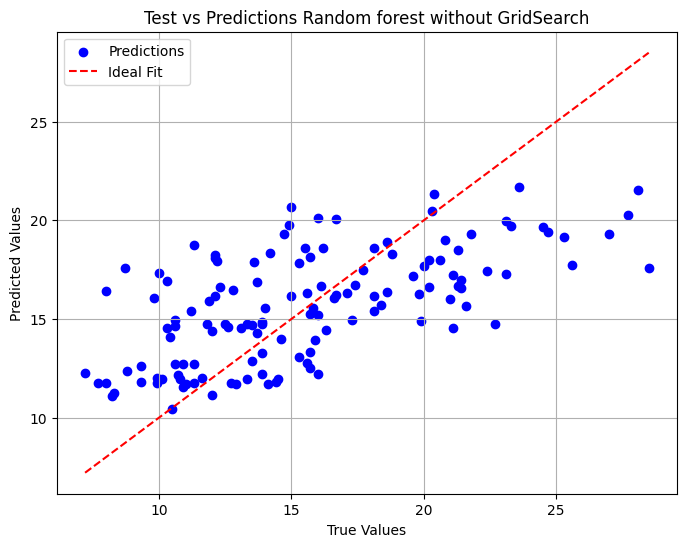

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_labels = predictions_rf.select("t").rdd.map(lambda row: row[0]).collect()
predicted_labels = predictions_rf.select("prediction").rdd.map(lambda row: row[0]).collect()

ideal_fit_line = np.linspace(min(true_labels), max(true_labels), 100)

plt.figure(figsize=(8, 6))
plt.scatter(true_labels, predicted_labels, color='blue', label='Predictions')
plt.plot(ideal_fit_line, ideal_fit_line, color='red', linestyle='--', label='Ideal Fit')
plt.title('Test vs Predictions Random forest without GridSearch')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

The results are moderate. Lets try random forest regressor with hyper-parameter tuning

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

rf2 = RandomForestRegressor(featuresCol="features", labelCol="t")

param_grid = ParamGridBuilder() \
    .addGrid(rf2.numTrees, [50, 100, 150]) \
    .addGrid(rf2.maxDepth, [5, 10, 15]) \
    .build()

evaluator = RegressionEvaluator(labelCol="t", predictionCol="prediction", metricName="rmse")

crossval = CrossValidator(estimator=rf2,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)

start = time.time()
cv_model = crossval.fit(train_data)

best_model = cv_model.bestModel
best_num_trees = best_model.getNumTrees
best_max_depth = best_model.getOrDefault("maxDepth")

predictions = best_model.transform(test_data)
end = time.time()

rmse = evaluator.evaluate(predictions)
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})

print(f"Total time taken for the grid search and model to fit : {end - start}s")
print(f"Best hyperparameters : \n# of Trees {best_num_trees}\nMax Depth : {best_max_depth}")
print(f"Root Mean Squared Error (RMSE) on test data : {rmse}")
print(f"R2 on test data : {r2}")
print(f"Mean Absolute Error (MAE) on test data : {mae} ")


Total time taken for the grid search and model to fit : 382.04315161705017s
Best hyperparameters : 
# of Trees 100
Max Depth : 15
Root Mean Squared Error (RMSE) on test data : 3.2885601712118926
R2 on test data : 0.5484801093859637
Mean Absolute Error (MAE) on test data : 2.5996878797889913 


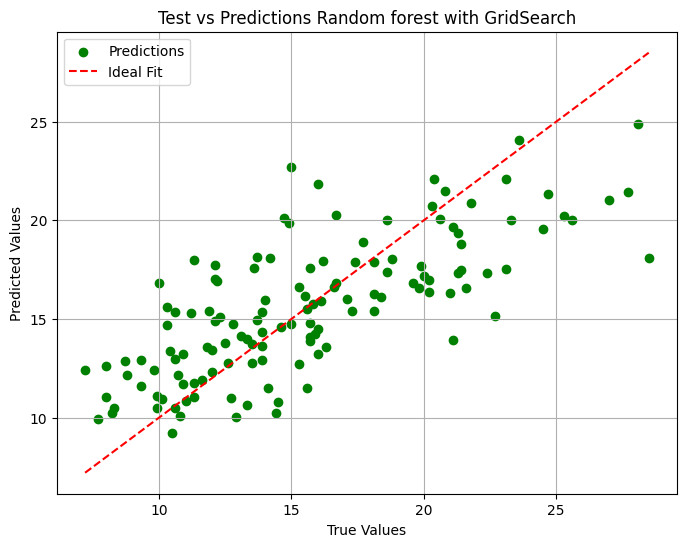

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

true_labels = predictions.select("t").rdd.map(lambda row: row[0]).collect()
predicted_labels = predictions.select("prediction").rdd.map(lambda row: row[0]).collect()

ideal_fit_line = np.linspace(min(true_labels), max(true_labels), 100)

plt.figure(figsize=(8, 6))
plt.scatter(true_labels, predicted_labels, color='green', label='Predictions')
plt.plot(ideal_fit_line, ideal_fit_line, color='red', linestyle='--', label='Ideal Fit')
plt.title('Test vs Predictions Random forest with GridSearch')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

There is a betterment in performance of the model.

Model 1: RFR without hyperparameter tuning

Model 2: RFR with hyperparameter tuning


Model 2 outperforms Model 1 in terms of all evaluation metrics:

It has a lower Root Mean Squared Error (RMSE), indicating better accuracy.
It has a higher R-squared (R2) value, indicating a better fit to the data.
It has a lower Mean Absolute Error (MAE), indicating better precision.

Although the graphs look similar, the difference is evident on the metrics